In [174]:
import pandas as pd
from datetime import datetime
from datetime import date
import seaborn as sns

In [175]:
df = pd.read_csv('voter_list.csv')

In [176]:
df.columns

Index(['job', 'company', 'ssn', 'residence', 'current_location', 'blood_group',
       'website', 'username', 'name', 'sex', 'address', 'mail', 'birthdate',
       'party'],
      dtype='object')

In [177]:
# create age column
df['dob'] = pd.to_datetime(df.birthdate, errors='coerce')
now = pd.to_datetime('now')
df['age'] = (now - df['dob']).astype('<m8[Y]')

In [178]:
# remove unrealistic ages
df = df[(df.age > 18) & (df.age < 95)]

In [179]:
df.shape

(3325, 16)

/Users/toddhendricks/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

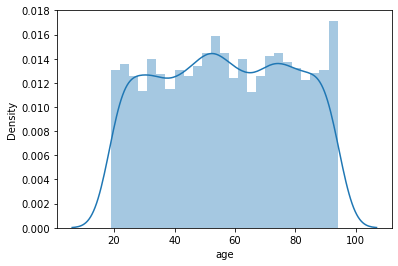

In [180]:
sns.distplot(df.age, bins=25)

In [181]:
df.residence = df.residence.str.replace('\n', ' ').str.split(',')


In [182]:
df['street'] = df.residence.str[0]
df['zip'] = df.residence.str[-1]

In [183]:
df['zip'] = df.zip.str.split(' ')

In [184]:
df['state'] = df['zip'].str[-2]
df['zip'] = df['zip'].str[-1]

In [185]:
df.head(7)

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,party,dob,age,street,zip,state
0,Copy,"Martinez, Butler and Tyler",739-93-9938,"[341 Melanie Corner Yatesfort, NV 10325]","(Decimal('-59.027381'), Decimal('170.343013'))",AB-,['http://www.payne-franco.info/'],sandy44,Sarah Whitaker,F,"0697 Hunter Trafficway\nSmithview, MI 71119",stephenpacheco@yahoo.com,1926-04-20,D,1926-04-20,94.0,341 Melanie Corner Yatesfort,10325,NV
2,Control and instrumentation engineer,Wade LLC,521-07-5850,"[753 Green Heights Romeromouth, ID 48554]","(Decimal('55.072960'), Decimal('130.394536'))",AB-,"['https://ramsey.com/', 'http://williams-holme...",mccannstephanie,Richard Williams,M,"PSC 4695, Box 9369\nAPO AA 96855",rayers@gmail.com,1998-11-09,D,1998-11-09,22.0,753 Green Heights Romeromouth,48554,ID
3,"Sound technician, broadcasting/film/video",Maxwell-George,403-55-6616,"[18600 Jordan Islands Ryanshire, IA 76250]","(Decimal('44.1995135'), Decimal('-130.254447'))",O-,['https://www.allen.info/'],jaredmiller,Tonya Collins,F,"9485 Monica Causeway\nSouth Juliebury, LA 36657",anthonywilson@gmail.com,1961-10-21,R,1961-10-21,59.0,18600 Jordan Islands Ryanshire,76250,IA
4,Graphic designer,Morris-Stanton,297-11-1710,"[5973 Smith Trace Apt. 615 Garciachester, KS ...","(Decimal('2.841826'), Decimal('60.096921'))",O+,['http://flores.info/'],elizabeth24,Gregory Stephenson,M,"116 Amy Shoals\nEast Tylerside, AR 39072",drobinson@yahoo.com,1988-06-17,R,1988-06-17,32.0,5973 Smith Trace Apt. 615 Garciachester,97467,KS
5,Primary school teacher,"Garcia, Aguilar and Patterson",346-15-4375,"[9703 Matthew Bypass Murraybury, AR 48951]","(Decimal('25.583975'), Decimal('-74.511847'))",AB+,['http://henderson-jackson.com/'],murrayjames,Gina Duran,F,"40921 Smith Inlet\nJordanstad, TX 75022",alvinhoffman@yahoo.com,1937-07-05,R,1937-07-05,83.0,9703 Matthew Bypass Murraybury,48951,AR
6,"Engineer, materials",Anderson-Miller,841-96-1387,"[791 Welch Heights Apt. 351 Angelamouth, UT 3...","(Decimal('12.6945595'), Decimal('55.053564'))",A+,"['http://www.hall.com/', 'https://fry.com/', '...",brownlauren,Mason Fernandez,M,"00433 Pham Radial\nSmithside, MD 97464",xjensen@hotmail.com,1964-12-25,D,1964-12-25,56.0,791 Welch Heights Apt. 351 Angelamouth,37158,UT
7,Surgeon,"Church, Morales and Garza",764-64-3632,"[3309 Tran Manor Toddmouth, OK 18955]","(Decimal('-18.060517'), Decimal('-170.023118'))",O+,"['http://www.garcia.biz/', 'http://delgado.inf...",ktaylor,Russell Decker,M,"PSC 3208, Box 3497\nAPO AE 99139",kelly54@yahoo.com,1981-04-07,R,1981-04-07,39.0,3309 Tran Manor Toddmouth,18955,OK


In [186]:
party_by_age = df.groupby(by=['party'])['age'].mean()
party_by_age

party
D    56.429678
R    56.823922
Name: age, dtype: float64

In [187]:
df.party.value_counts()

D    1678
R    1647
Name: party, dtype: int64

In [195]:
ct = pd.crosstab(df.state, df.party)
ct['spread'] = ct['D'] - ct['R']

In [199]:
ct = ct.sort_values(by='spread', ascending=False)

<AxesSubplot:xlabel='state', ylabel='spread'>

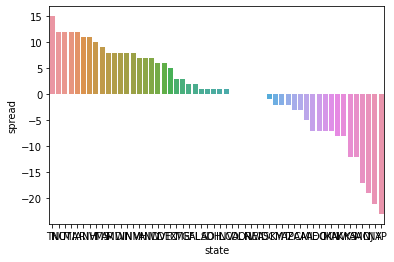

In [205]:
x = ct.index
y = ct.spread
sns.barplot(x=x,y=y)

In [204]:
x

Index(['TN', 'NC', 'UT', 'MA', 'IA', 'RI', 'NH', 'VT', 'MS', 'AR', 'MD', 'WI',
       'IN', 'NM', 'VA', 'HI', 'ND', 'WV', 'DE', 'TX', 'CT', 'ME', 'GA', 'FL',
       'LA', 'SD', 'OH', 'IL', 'NV', 'CO', 'AL', 'OR', 'NE', 'WA', 'ID', 'SC',
       'KY', 'MT', 'AZ', 'PA', 'CA', 'MI', 'AE', 'DC', 'OK', 'MN', 'AK', 'WY',
       'KS', 'AA', 'MO', 'NJ', 'NY', 'AP'],
      dtype='object', name='state')